Hello everyone,

#### Welcome in this place. Let's start.

In [1]:
import pandas as pd
import numpy as np
import gensim
from scipy.spatial import distance
from sklearn.cluster import DBSCAN, KMeans
import matplotlib.pyplot as plt

C:\Users\E3850003\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Slow version of gensim.models.doc2vec is being used


#### PREPROCESSING

In this example I will try to cluster a cloud of 56 words already grouped - apriori - in 12 clusters.

I will apply the word2vec transformation ( using 'GoogleNews-vectors-negative300.bin' already trained by Google) and I'll cluster these word using two different techniques: Kmeans and DBSCAN.

This is the first of three notebooks about words clustering. 

I hope you will find these usefull.

In [3]:
words = ['man','woman','girl','boy','father','grandfather','grandmother',
         'one','two','three','four','five','seven',
         'dog','cat','rabbit',
         'queen','king','princess',
         'text','word','mail','letter',
         'laptop','desktop','keyboard','monitor',
         'kitchen','bathroom','bedroom','room',
         'shoes','skirt','dress','shirt',
         'apple','pear','banana','watermelon','peach',
         'blue','red','white','yellow','black','brown',
         'school','university','class','course','teacher',
         'finance','corporate','economic','price','stock'
]

words.sort()
lwords = len(words)

In [4]:
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

### W2V

Just in case you do not know, word2vec is a good way to associate a string with a vector of numbers. 

This is a good link: https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/

In this notebook I chose to use a pre-trained model: 'GoogleNews-vectors-negative300.bin'. You can download this file (~3GB) here: https://github.com/mmihaltz/word2vec-GoogleNews-vectors

In my opinion this model is good if you have to manage an english text and if you are not working in a niche task. This model was built on 3 billions of words and it generates 300-dimension word vector.

### K-means

In [5]:
matrix = pd.DataFrame(0, index=words, columns = ['w2v_'+str(i) for i in range(0,300)])
for w in words:
    matrix.loc[w] =  model.word_vec(w)
    
matrix.head()

,w2v_0,w2v_1,w2v_2,w2v_3,w2v_4,w2v_5,w2v_6,w2v_7,w2v_8,w2v_9,...,w2v_290,w2v_291,w2v_292,w2v_293,w2v_294,w2v_295,w2v_296,w2v_297,w2v_298,w2v_299
apple,-0.064453,-0.160156,-0.012085,0.134766,-0.229492,0.162109,0.304688,-0.179688,-0.121094,0.253906,...,-0.126953,-0.039795,0.131836,-0.166016,0.125000,0.051270,-0.149414,0.136719,-0.020752,0.343750
banana,-0.085449,0.047119,-0.069336,0.302734,-0.187500,-0.031982,0.029541,-0.205078,-0.090332,0.298828,...,-0.177734,-0.082520,0.038574,-0.294922,0.005524,0.054443,-0.094727,0.126953,0.117188,0.177734
bathroom,-0.047363,0.036133,-0.023926,-0.161133,0.098633,0.098145,-0.061768,-0.017212,0.515625,-0.031128,...,-0.084473,0.021118,0.090820,-0.023438,-0.087402,-0.163086,-0.135742,0.023193,0.000824,0.158203
bedroom,0.167969,-0.161133,-0.023682,-0.102051,0.408203,0.027832,0.116211,-0.122070,0.287109,0.177734,...,-0.330078,-0.076660,-0.090820,0.131836,-0.100586,-0.341797,-0.006897,-0.087402,0.126953,0.192383
black,0.104980,0.018433,0.008972,-0.012817,-0.028809,-0.059326,-0.089844,-0.068359,0.172852,0.019043,...,-0.014648,-0.024292,-0.281250,0.083496,-0.086426,-0.004333,0.175781,0.092285,0.061035,-0.132812


In [6]:
kmeans_result = KMeans(init='k-means++', n_clusters=12, n_init=10)
kmeans_result.fit(matrix)

evaluation = pd.concat(
    [
        pd.DataFrame(kmeans_result.labels_, columns=['cluster']),
        pd.DataFrame(words, columns=['name'])
    ],
    axis=1)

for i in range(0,12):
    print(evaluation[evaluation['cluster']==i])
    print('\n')

    cluster        name
0         0       apple
1         0      banana
32        0       peach
33        0        pear
51        0  watermelon


    cluster        name
9         1       class
11        1      course
18        1        five
19        1        four
27        1      letter
30        1     monitor
31        1         one
40        1      school
41        1       seven
46        1     teacher
47        1        text
48        1       three
49        1         two
50        1  university
54        1        word


    cluster    name
4         2   black
5         2    blue
7         2   brown
38        2     red
52        2   white
55        2  yellow


    cluster    name
8         3     cat
13        3     dog
37        3  rabbit


    cluster      name
24        4      king
35        4  princess
36        4     queen


    cluster      name
2         5  bathroom
3         5   bedroom
25        5   kitchen
39        5      room


    cluster         name
6         6      

###### NOTES

K-means looks ok: it generated good clusters except for the cluster "1".

### EVALUATION BY SILHOUETTE

Also the silhouette shows what we know from the beginning: the right number of clusters for this problem is 12 !

Good to know.

In [7]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

For n_clusters = 8 The average silhouette_score is : 0.159591


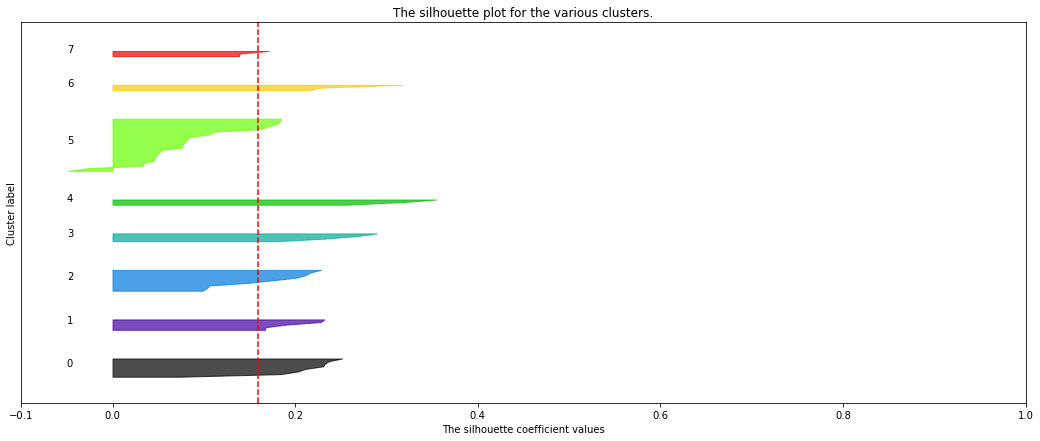

For n_clusters = 9 The average silhouette_score is : 0.14


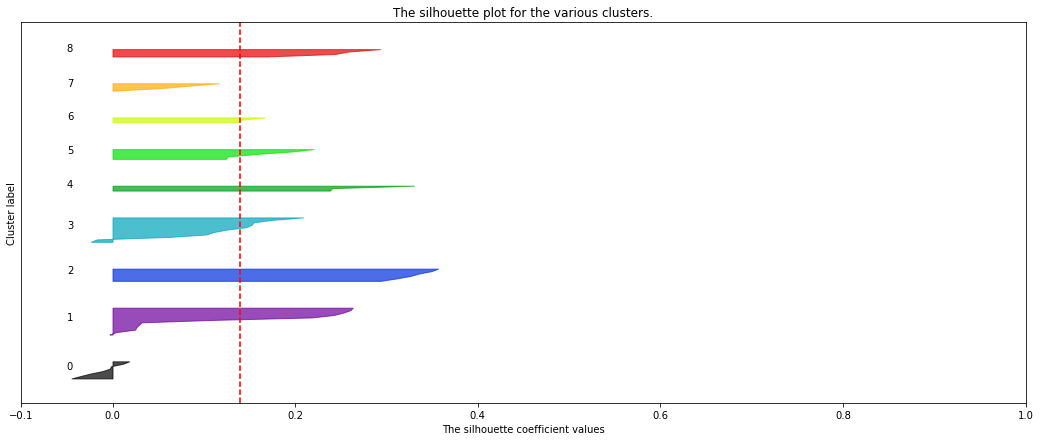

For n_clusters = 10 The average silhouette_score is : 0.151125


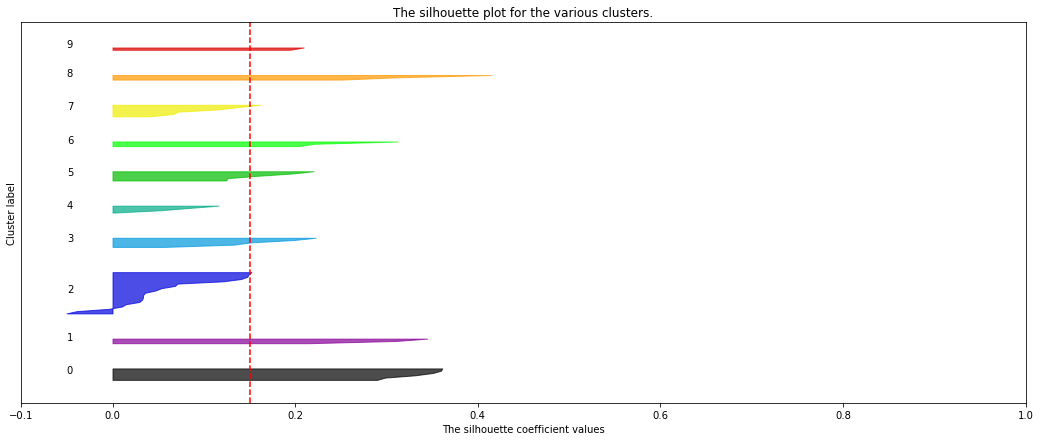

For n_clusters = 11 The average silhouette_score is : 0.159847


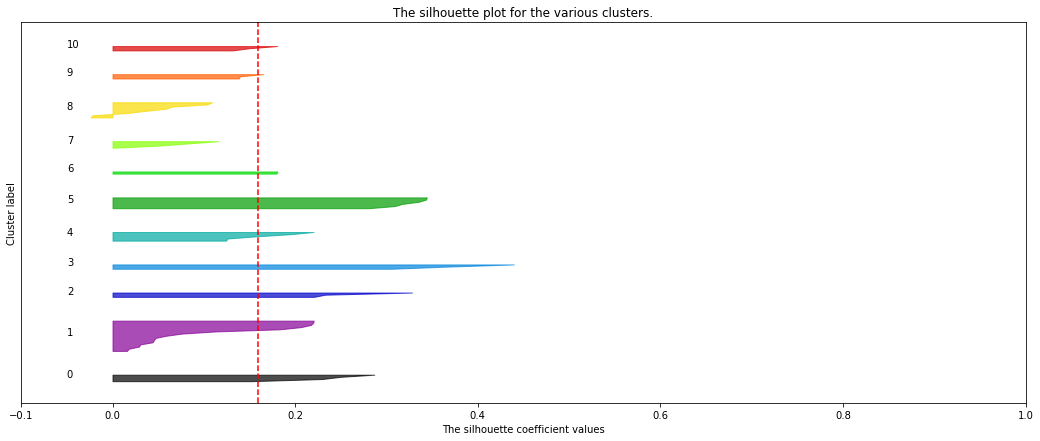

For n_clusters = 12 The average silhouette_score is : 0.182552


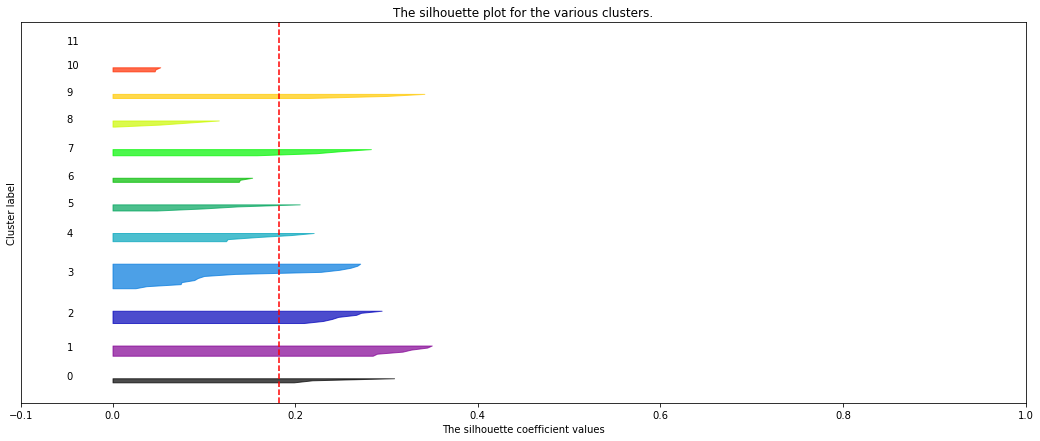

For n_clusters = 13 The average silhouette_score is : 0.17253


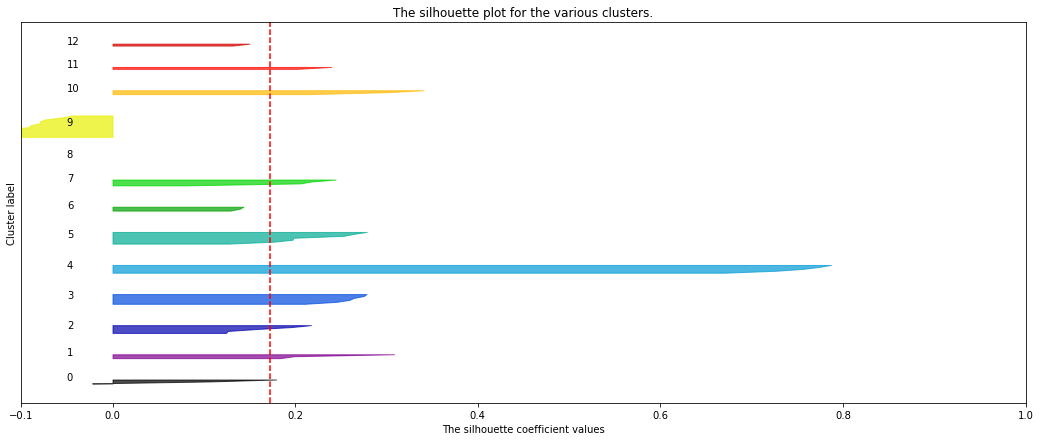

For n_clusters = 14 The average silhouette_score is : 0.18039


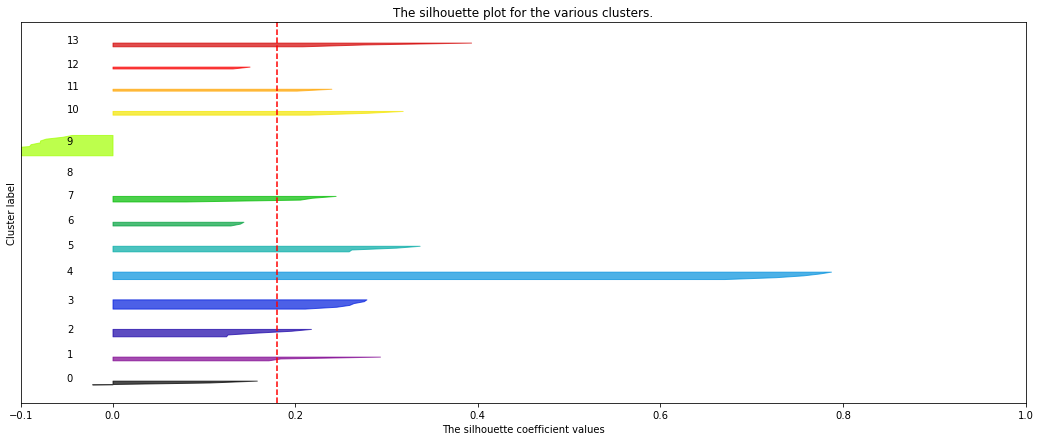

In [8]:
for n_clusters in range(8, 15):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])


    ax1.set_ylim([0, len(matrix) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(matrix)

    silhouette_avg = silhouette_score(matrix, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :",
          silhouette_avg)

    sample_silhouette_values = silhouette_samples(matrix, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels
                                                                 == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

### DBSCAN

- Wiki:
https://en.wikipedia.org/wiki/DBSCAN

- Sklearn tutorial:
http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

I would like to suggest another algorithm: DBSCAN. I attached two links regarding 1) wiki page the algorithm, 2) sklearn tutorial.

If you have the patience to arrive at the end of these notebooks it will be clear the reasons of these starting points.

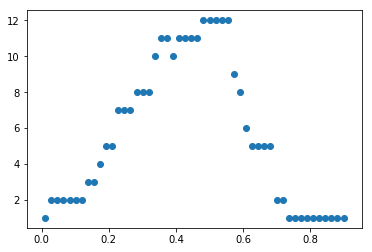

In [9]:
distance_matrix = np.zeros((lwords, lwords))
for i in range(0,lwords):
    for j in range(i,lwords):
        out = distance.cosine(matrix.values[i,:],matrix.values[j,:])
        distance_matrix[i,j] = out
distance_matrix = distance_matrix + distance_matrix.T
    
norma_matrix = distance_matrix/np.max(distance_matrix)

n_cluster = []
roll = np.linspace(0.01,0.9,50)
for i in roll:
    db = DBSCAN(eps=i, min_samples=2, metric='precomputed',n_jobs=-1).fit(norma_matrix)
    n_cluster.append(len(set(db.labels_)))
    
plt.scatter(roll, n_cluster)
plt.show()

In [10]:
db = DBSCAN(eps=roll[np.argmax(n_cluster)], min_samples=2, metric='precomputed',n_jobs=-1).fit(norma_matrix)

evaluation_dbscan = pd.concat(
    [
        pd.DataFrame(db.labels_, columns=['cluster']),
        pd.DataFrame(words, columns=['name'])
    ],
    axis=1)

for i in range(-1,11):
    print(evaluation_dbscan[evaluation_dbscan['cluster']==i])
    print('\n')

    cluster      name
9        -1     class
11       -1    course
15       -1  economic
27       -1    letter
28       -1      mail
30       -1   monitor
42       -1     shirt
43       -1     shoes
47       -1      text
54       -1      word


    cluster        name
0         0       apple
1         0      banana
32        0       peach
33        0        pear
51        0  watermelon


    cluster      name
2         1  bathroom
3         1   bedroom
25        1   kitchen
39        1      room


    cluster    name
4         2   black
5         2    blue
7         2   brown
38        2     red
52        2   white
55        2  yellow


    cluster         name
6         3          boy
16        3       father
20        3         girl
21        3  grandfather
22        3  grandmother
24        3         king
29        3          man
35        3     princess
36        3        queen
53        3        woman


    cluster    name
8         4     cat
13        4     dog
37        4  rabbit

##### NOTES

One advantage of this algorithm is the cluster named "-1". This cluster is always generated by the union of the all points defined "noise" from the algorithm. DBSCAN is robust to outliers.

But unfortunally at the moment its score seems worst than K-means. 

## MORE COMPLEX APPLICATION

In this case we do not know a priori the numbers of clusters. And we do not know if all the words have at least a close point. 

In [11]:
words = [
    'cheerful', 'gift', 'color', 'people', 'isolated', 'finance', 'woman', 'text',
    'merchandise', 'container', 'wedding',
    'illustration', 'desktop', 'girl', 'beautiful', 'eyebrow', 'care', 'box', 'person',
    'equipment', 'celebration','man', 'architecture', 'science', 'hygiene', 'writing',
    'fruit', 'luxury', 'steel', 'food', 'one', 'sweet','flower', 'cute', 'health',
    'treatment', 'summer', 'fashion', 'pretty', 'clean', 'nature','lifestyle',
    'table', 'wood', 'style', 'meal', 'form', 'wealth', 'set', 'paper', 'medicine',
    'vaccination','card', 'symbol', 'flora', 'plate', 'knife', 'apartment', 'order',
    'pineapple', 'culture', 'investment', 'cloud','bright', 'outdoors', 'gherkin',
    'research', 'vegetable', 'bottle', 'leaf', 'hand', 'smell', 'sign', 'tool',
    'creativity', 'delicious','friendship','mascara','banner','city','chemistry',
    'business','drug','sexy','biology','soap','adult','craft','decoration','young',
    'label','shadow','travel','brush','lipstick','blank','instrument','freshness',
    'image','origami','shining','beach','power','sale','hot','romance','meeting',
    'esign','graphic','panoramic','aromatherapy','data','face','trendy','horizontal',
    'vector','row','love','catering','number','teeth','pencil','group','template',
    'sea','lamp','healthcare','sky','liquid','technology','glazed','preparation',
    'old','apple','shampoo','medical','skin','bill','collage','step','education',
    'water','plastic','art','collection','refreshment','polish','ammunition',
    'eye','chemical','couple','sewing','eyesight','wall','Christmas','thread',
    'heart','makeup','gloves','blood','driver','money','temperature','shape','punch',
    'model','success','perfume','office','battery','unity','abstract','page','glass',
    'eyeshadow','letter','computer','many','competition','sit','modern','anniversary',
    'lotion','happiness','party','purity','portrait','diagram','vertical','little',
    'bank','fun','illness','dinner','adolescent','healthy','performance','event',
    'family','bulb','toy','needle','child','candy','conceptual','safety','invitation',
    'hotel','shop','variation','pattern','traditional','snail','cooking','WorldWideWeb',
    'greeting','nutrition','merry','weapon','industry','sport','winter','curve',
    'attractive','illuminated','hospital','retro','service','ink','danger','indoors',
    'look','lips','two','layout','season','serious','bathroom','relaxation','commercial',
    'corn','canine','spoke','bar','chair','picnic','margin','growth','vintage','stock',
    'house','market','entertainment','starfish','human','communication','empty','message',
    'round','nail','monochrome','energy','accessory','herb','machine','composure',
    'looking','leisure','diabetes','mustache','dancing','fever','blush','century',
    'school','elegant','wing','painter','spray','tube','eyelash','sketch','cocktail',
    'toiletries','squad','spherical','basket','cucumber','option','juicy','dollar',
    'wet','addiction','hair','document','dark','urban','vehicle','capsule','rose',
    'dawn','gingerbread','bag','kind','romantic','alphabet','actress','booklet',
    'display','cherry','chrome','price','award','restaurant','room','velvet',
    'mouth','bullet','sight','scissors','shotgun','eyeball','composition','copper',
    'tree','boxer','street','metallic','wooden','graph','drink','microbiology',
    'festival','cool','sugar','sand','mystery','definition','milk','splash','pain',
    'shopping','hoggish','show','ball','breakfast','flame','tall','packaging',
    'internet','glisten','cartridge','fame','exploration','snow','laptop','joy',
    'bikini','building','tourism','snowflake','bicycle','gingham','bowl',
    'pepper','element','crate','seashell','textile','bouquet','motivation','bed',
    'heat','powder','chocolate','stripe','oil','animal','manicure','piano','chance',
    'identity','surprise','syringe','inside','sequence' ,'tropical','time',
    'watermelon','epicure','league','electricity','assortment','berry','perfumery','pill',
    'kiss','corporate','palette','balance','fingernail','offense','gauge','confetti',
    'pine','strength','security','cold','skittish','grass','savings','baby',
    'enamel','disguise','hairdo','contemporary','laboratory','recycling','dirty',
    'sphere','cream','screen','monthly','satin','constellation','tan','togetherness',
    'tablecloth','pet','invalid','cyclist','parsley','shelf','skein','note','soup','seed',
    'recreation','drive','tile','panorama','batch','smoke','thermometer','Celsius',
    'abundance','alcohol','feather','juice','sound','fork','gold','geisha','marshmallow',
    'candle','repair','crowd','initiation','case','car','lid','club','work',
    'pumpkin','cylinder','keyboard','slimy','movie','astronomy','domestic','wheel',
    'bike','country','wool','fall','painkiller','swimming','bedroom','seat',
    'sunglasses','lime','kimono','strawberry','measure','language','nightlife',
    'Halloween','mask','key','shell','cup','downtown','annual','missile','moon',
    'space','dog','spirituality','telephone','raspberry','coffee','mosaic','wine'
    ,'paintbrush'
]

words.sort()
lwords = len(words)

In [12]:
matrix = pd.DataFrame(0, index=words, columns = ['w2v_'+str(i) for i in range(0,300)])
for w in words:
    matrix.loc[w] =  model.word_vec(w)

For n_clusters = 20 The average silhouette_score is : 0.0160964


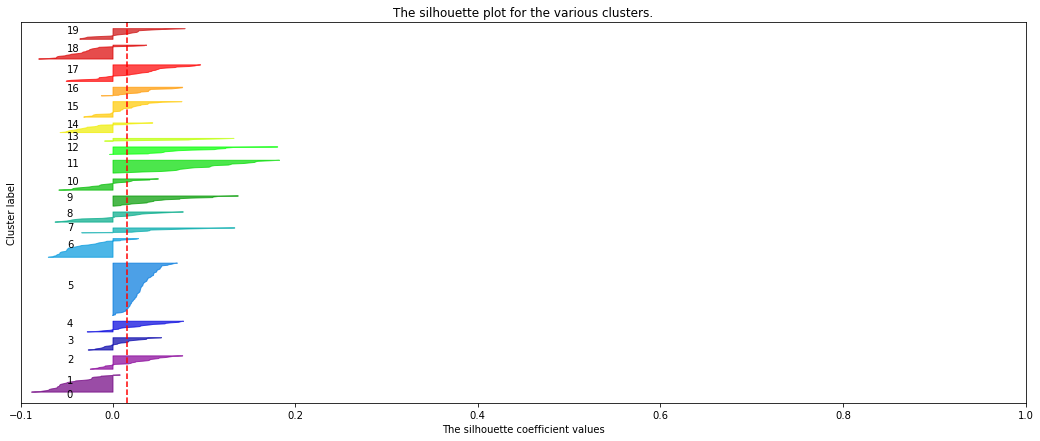

For n_clusters = 25 The average silhouette_score is : 0.00602087


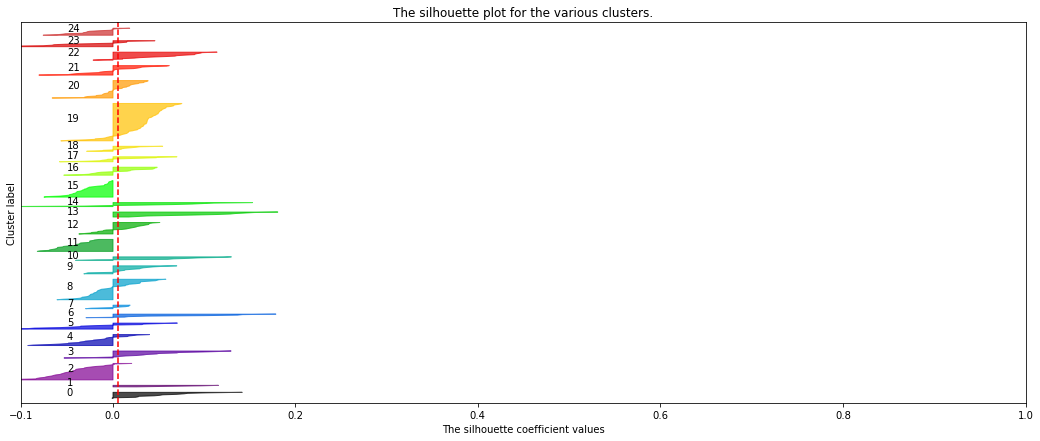

For n_clusters = 30 The average silhouette_score is : 0.0202349


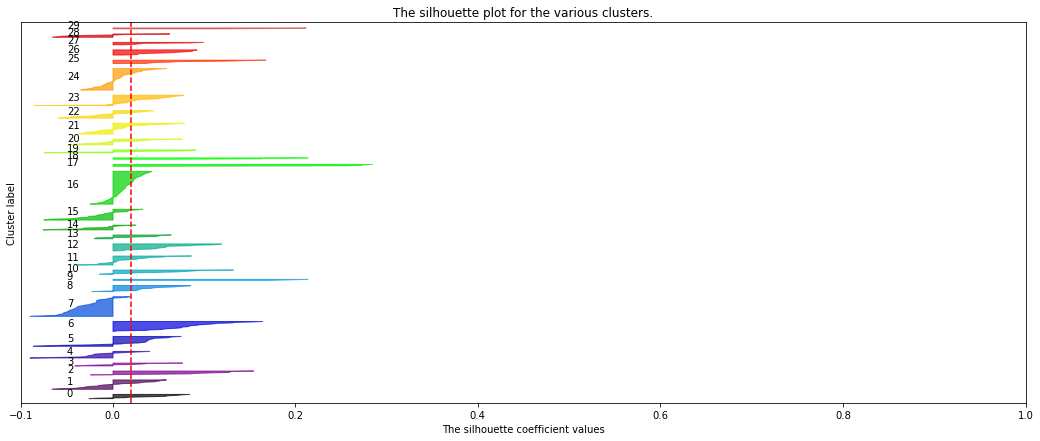

For n_clusters = 35 The average silhouette_score is : 0.0149765


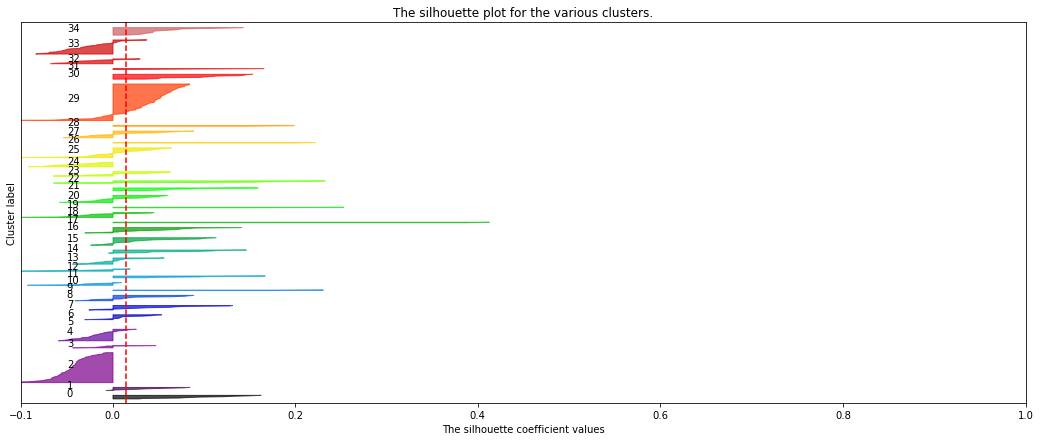

For n_clusters = 40 The average silhouette_score is : 0.00531244


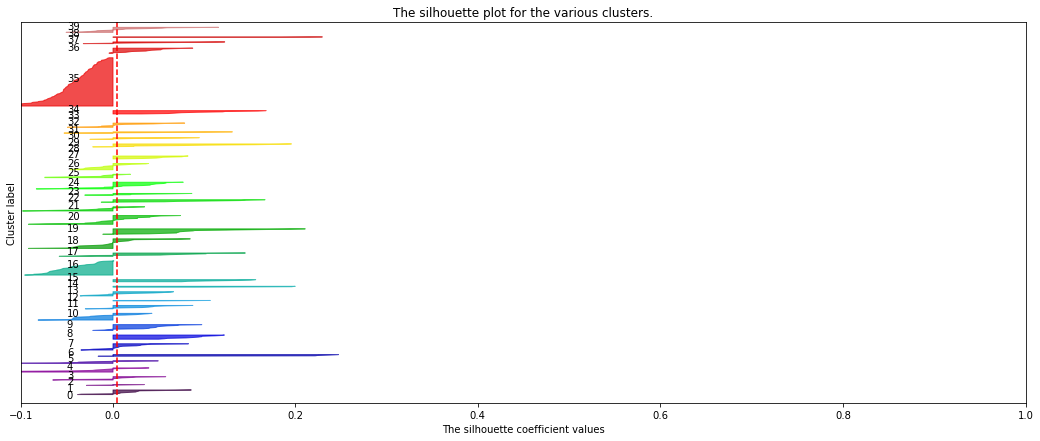

For n_clusters = 45 The average silhouette_score is : 0.0115605


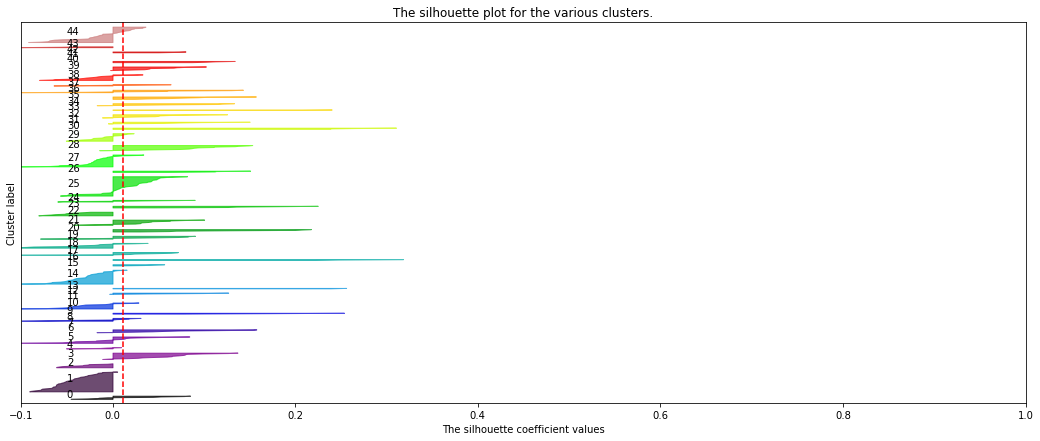

For n_clusters = 50 The average silhouette_score is : 0.0185034


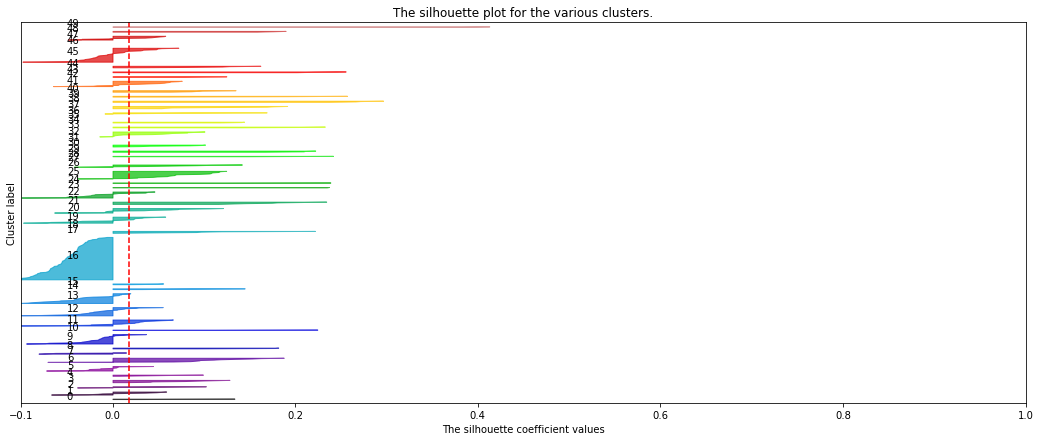

For n_clusters = 55 The average silhouette_score is : 0.0237766


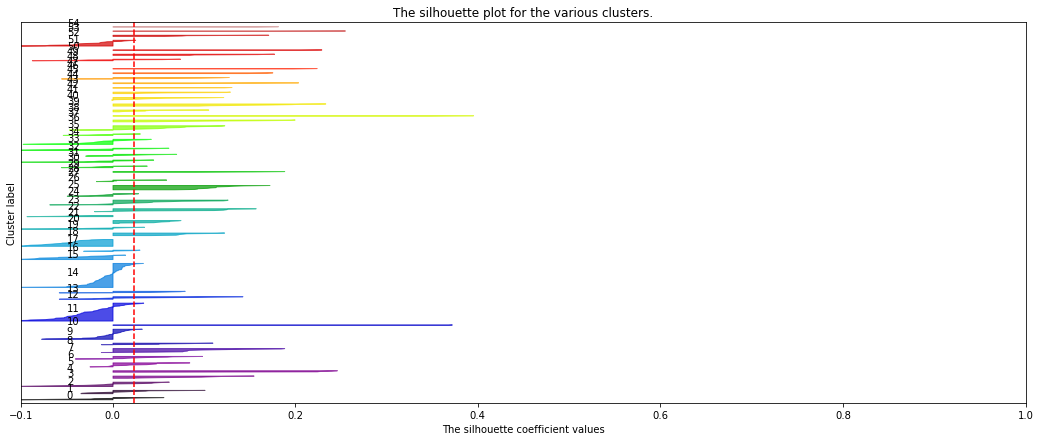

For n_clusters = 60 The average silhouette_score is : 0.0200537


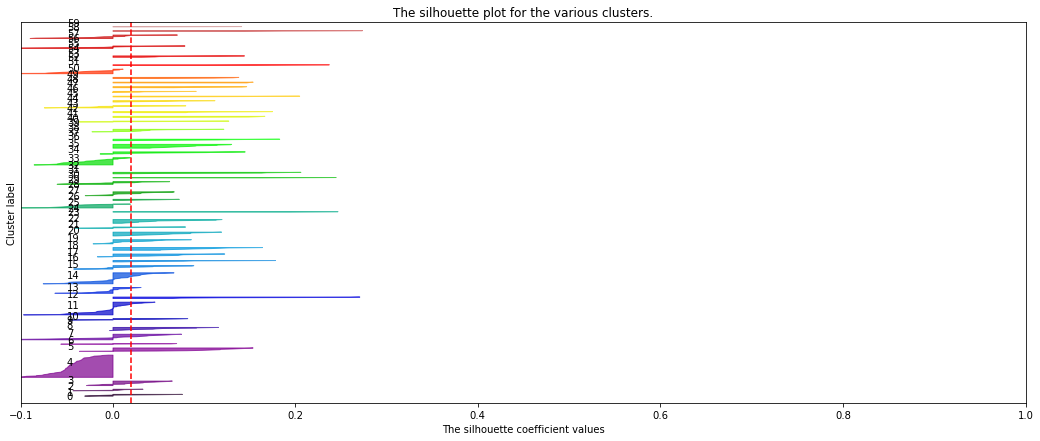

For n_clusters = 65 The average silhouette_score is : 0.00365654


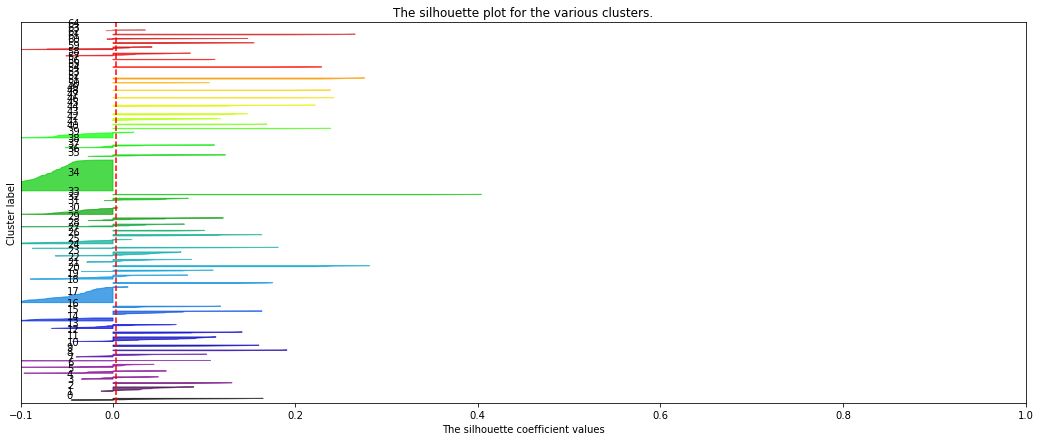

For n_clusters = 70 The average silhouette_score is : 0.0158155


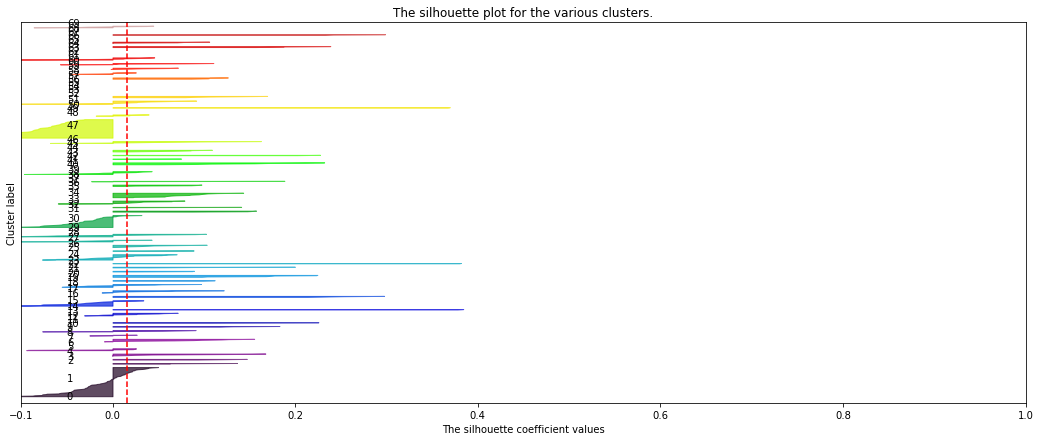

For n_clusters = 75 The average silhouette_score is : 0.00700079


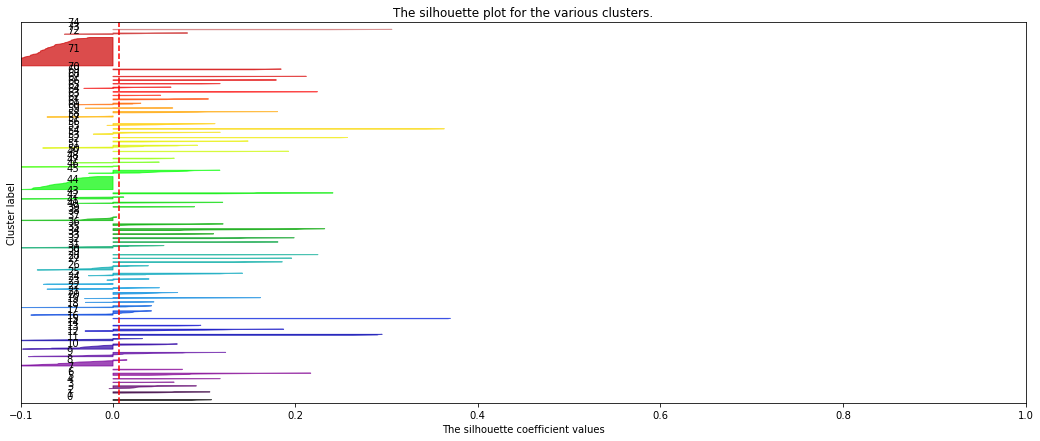

For n_clusters = 80 The average silhouette_score is : -0.00483462


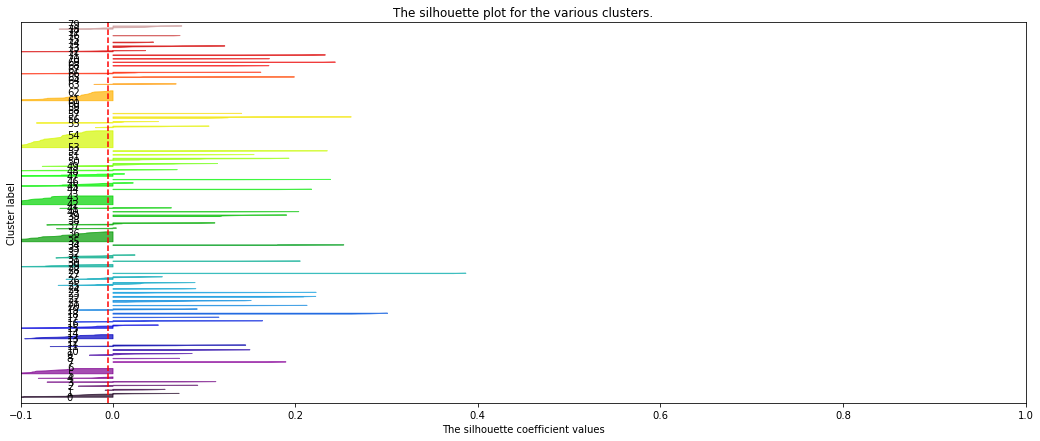

In [13]:
for n_clusters in range(20, 81,5):
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])


    ax1.set_ylim([0, len(matrix) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(matrix)

    silhouette_avg = silhouette_score(matrix, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :",
          silhouette_avg)

    sample_silhouette_values = silhouette_samples(matrix, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels
                                                                 == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

For n_clusters = 55 The average silhouette_score is : 0.0237766


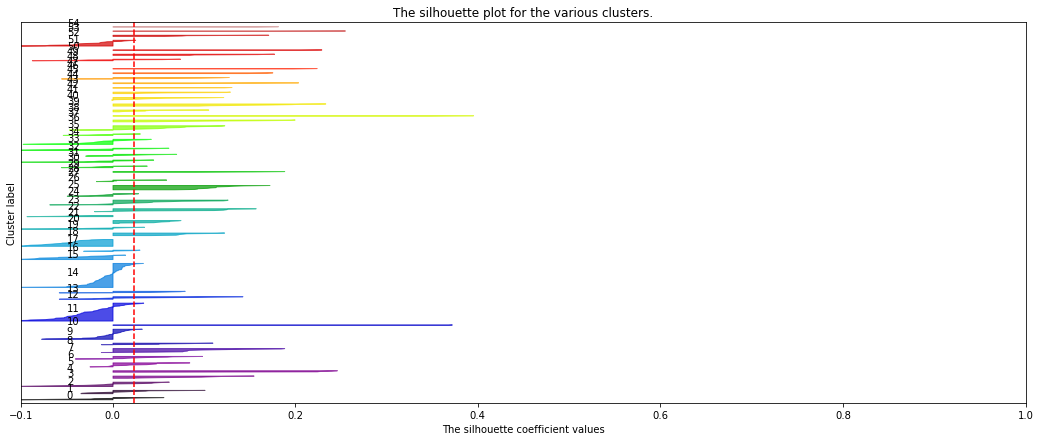

For n_clusters = 56 The average silhouette_score is : 0.0188854


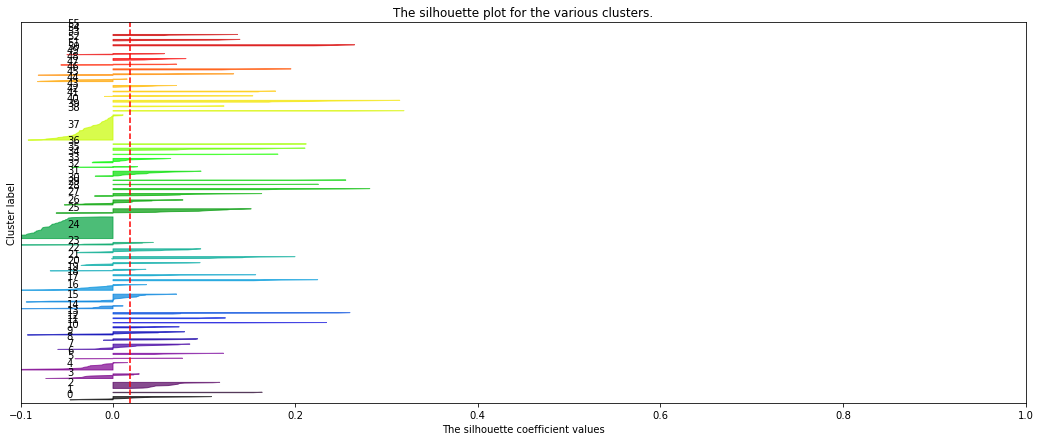

For n_clusters = 57 The average silhouette_score is : 0.011491


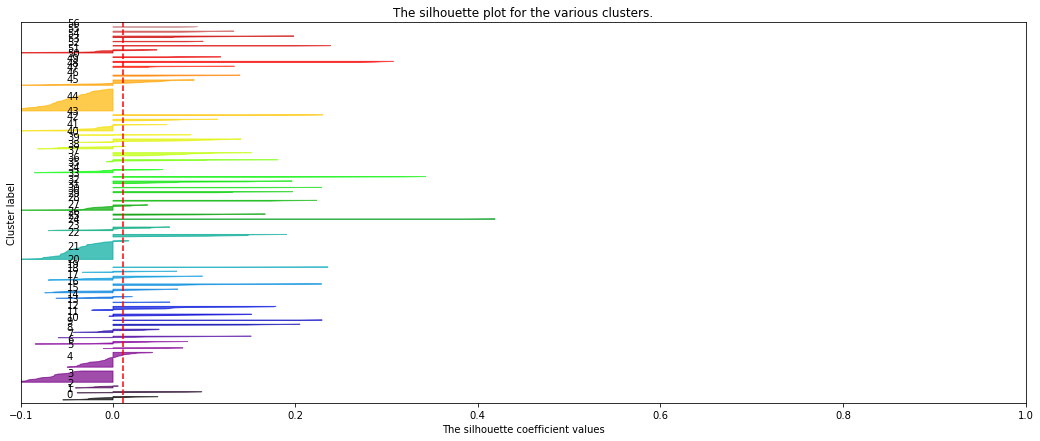

For n_clusters = 58 The average silhouette_score is : 0.0253572


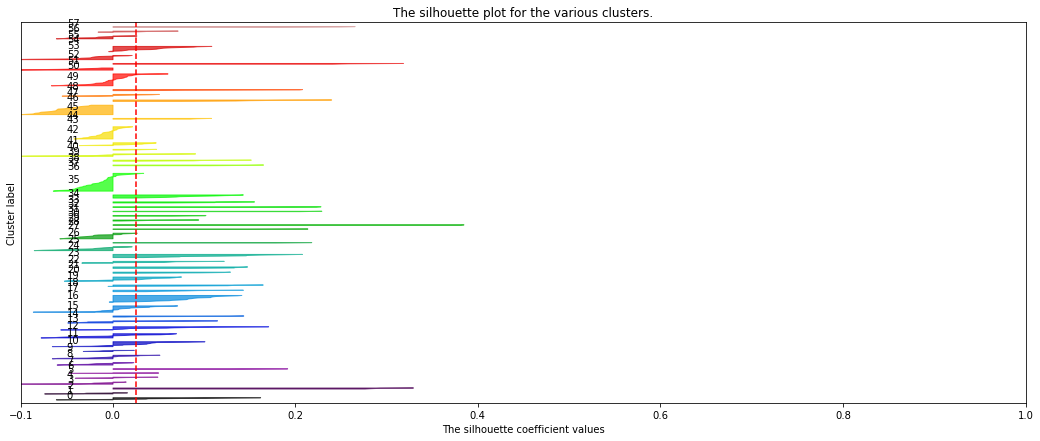

For n_clusters = 59 The average silhouette_score is : 0.0190578


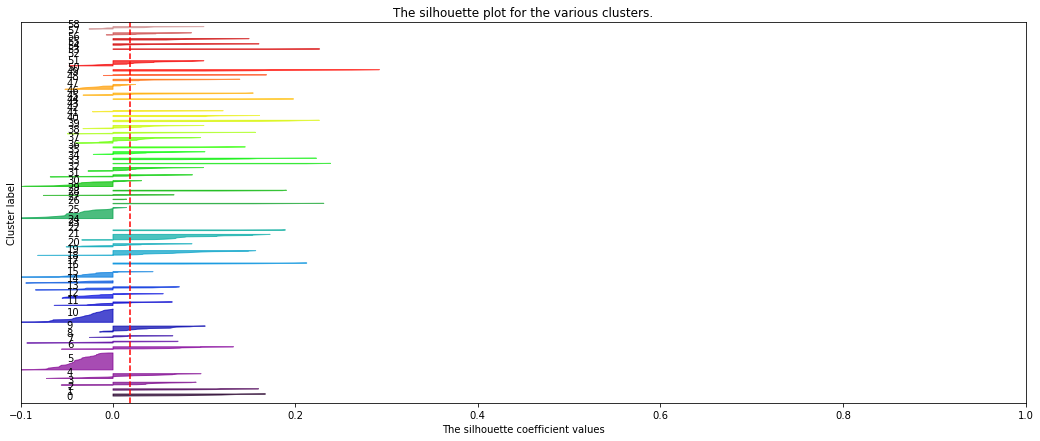

For n_clusters = 60 The average silhouette_score is : 0.0200537


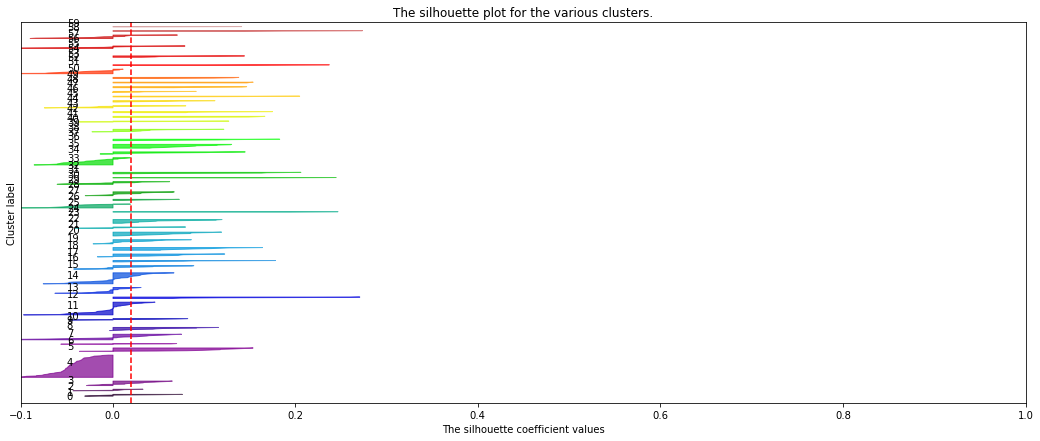

In [14]:
for n_clusters in range(55, 61,1):
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])


    ax1.set_ylim([0, len(matrix) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(matrix)

    silhouette_avg = silhouette_score(matrix, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :",
          silhouette_avg)

    sample_silhouette_values = silhouette_samples(matrix, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels
                                                                 == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

In [15]:
kmeans_result = KMeans(init='k-means++', n_clusters=58, n_init=10)
kmeans_result.fit(matrix)

evaluation = pd.concat(
    [
        pd.DataFrame(kmeans_result.labels_, columns=['cluster']),
        pd.DataFrame(words, columns=['name'])
    ],
    axis=1)

for i in range(0,58):
    print(evaluation[evaluation['cluster']==i])
    print('\n')

     cluster        name
365        0  restaurant
400        0        shop
401        0    shopping


     cluster         name
30         1         bank
62         1     business
94         1   commercial
109        1    corporate
160        1  exploration
175        1      finance
204        1       growth
229        1     industry
236        1   investment
276        1       market
354        1        price
364        1     research
374        1         sale
377        1      savings
433        1        stock
452        1   technology
489        1       wealth


     cluster           name
10         2          adult
22         2     assortment
34         2          batch
76         2         chance
95         2  communication
96         2    competition
111        2         couple
124        2        dancing
125        2         danger
145        2          drive
158        2          esign
167        2           face
168        2           fall
182        2           form
230     

##### NOTES

It's easy to see that cause the complexity of the requirement the result of the silhouette is dramatically worst than the previous case.

In this case I accepted a number of cluster equal to 58.

From the results it's possible to see how the accuracy of the clustering is affected by the starting noise and uncertainty.

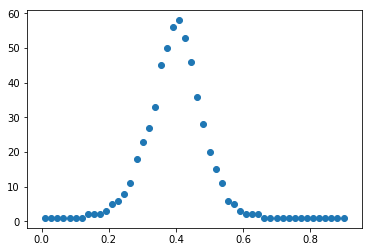

In [16]:
distance_matrix = np.zeros((lwords, lwords))
for i in range(0,lwords):
    for j in range(i,lwords):
        out = distance.cosine(matrix.values[i,:],matrix.values[j,:])
        distance_matrix[i,j] = out
distance_matrix = distance_matrix + distance_matrix.T
    
norma_matrix = distance_matrix/np.max(distance_matrix)

n_cluster = []
roll = np.linspace(0.01,0.9,50)
for i in roll:
    db = DBSCAN(eps=i, min_samples=2, metric='precomputed',n_jobs=-1).fit(norma_matrix)
    n_cluster.append(len(set(db.labels_)))
    
plt.scatter(roll, n_cluster)
plt.show()

In [17]:
db = DBSCAN(eps=roll[np.argmax(n_cluster)], min_samples=2, metric='precomputed',n_jobs=-1).fit(norma_matrix)

evaluation_dbscan = pd.concat(
    [
        pd.DataFrame(db.labels_, columns=['cluster']),
        pd.DataFrame(words, columns=['name'])
    ],
    axis=1)

for i in range(-1,56):
    print(evaluation_dbscan[evaluation_dbscan['cluster']==i])
    print('\n')

     cluster          name
3         -1  WorldWideWeb
5         -1     abundance
6         -1     accessory
7         -1       actress
8         -1     addiction
12        -1      alphabet
13        -1    ammunition
15        -1   anniversary
19        -1  architecture
20        -1  aromatherapy
22        -1    assortment
24        -1    attractive
25        -1         award
27        -1           bag
28        -1       balance
29        -1          ball
30        -1          bank
31        -1        banner
33        -1        basket
34        -1         batch
36        -1       battery
37        -1         beach
47        -1         blank
48        -1         blood
49        -1         blush
50        -1       booklet
52        -1       bouquet
53        -1          bowl
54        -1           box
55        -1         boxer
..       ...           ...
454       -1     telephone
456       -1      template
457       -1          text
458       -1       textile
460       -1        thread
4

### CONCLUSION

My conclusion after this notebook is that DBSCAN (and cosine similarity as metric ) is much more robust if the starting wordcloud is affected by noise and uncertainty.

In the futures notebook I will try to reduce the noise of the cloud to reach a better result.

###### I hope you appreciate these examples. See you around,
###### Federico